In [45]:
# Import necessary libraries
import pandas as pd  # Import pandas for data manipulation
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Load the downloaded dataset into a pandas DataFrame
# Update the file path to the correct location of the dataset
import os

path = "../stephanie/acaht_prod_fourn_stock.csv"  # Assign the path to the variable 'path'
if os.path.exists(path):
	data = pd.read_csv(path)   # Load the dataset if the file exists
	print("Dataset loaded successfully.")
else:
	print(f"File not found at path: {path}")

Dataset loaded successfully.


In [9]:
data.head()

,id_achat,date_achat,id_produit,quantité,id_fournisseur,prix_unitaire,délai_livraison_jours,montant_total,mois,année,...,marque,prix,stock_minimum,nom_fournisseur,ville,pays,fiabilité,délai_moyen_jours,niveau_stock,entrepot
0,PO000001,2024-03-22,P00627,150,S029,129.62,14,19443.0,3,2024,...,Atelier Minéral,39.95,18,Fontaine Lopes S.A.,Helsinki,Finlande,0.54,6,289,Paris
1,PO000002,2024-06-12,P00469,50,S028,110.81,8,5540.5,6,2024,...,Reflet d'or,25.58,18,Delattre Blot S.A.,Berlin,Allemagne,0.74,8,80,Paris
2,PO000003,2024-01-19,P00849,75,S001,140.58,8,10543.5,1,2024,...,Ãveil Ãlégant,62.78,83,Lecomte et Fils,Zurich,Suisse,0.84,10,54,Marseille
3,PO000004,2024-11-20,P00484,500,S028,120.77,9,60385.0,11,2024,...,Reflet d'or,259.47,39,Delattre Blot S.A.,Berlin,Allemagne,0.74,8,249,Marseille
4,PO000005,2a024-06-07,P00196,50,S025,256.05,13,12802.5,6,2024,...,Luxe eclat,353.45,33,Techer SA,Varsovie,Pologne,0.92,12,119,Paris


In [10]:
data.describe()

,quantité,prix_unitaire,délai_livraison_jours,montant_total,mois,année,jour_semaine,prix,stock_minimum,fiabilité,délai_moyen_jours,niveau_stock
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.0,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000
mean,99.512500,155.187121,7.955900,15530.706135,6.537200,2024.0,2.978200,258.293713,53.283000,0.697760,7.05340,147.771300
std,98.580534,83.661601,3.754273,19313.230160,3.455316,0.0,2.011549,141.211258,25.376137,0.143535,2.19076,88.354962
min,10.000000,10.030000,2.000000,100.300000,1.000000,2024.0,0.000000,22.220000,10.000000,0.500000,3.00000,0.000000
25%,25.000000,83.087500,5.000000,3508.937500,4.000000,2024.0,1.000000,130.720000,31.000000,0.540000,6.00000,72.000000
50%,75.000000,155.365000,8.000000,9099.500000,7.000000,2024.0,3.000000,258.450000,54.000000,0.650000,7.00000,145.000000
75%,100.000000,227.740000,11.000000,19748.062500,10.000000,2024.0,5.000000,376.880000,74.000000,0.740000,8.00000,226.000000
max,500.000000,299.980000,14.000000,148310.000000,12.000000,2024.0,6.000000,499.720000,99.000000,1.000000,14.00000,299.000000


In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 22 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id_achat               10000 non-null  object 
 1   date_achat             10000 non-null  object 
 2   id_produit             10000 non-null  object 
 3   quantité               10000 non-null  int64  
 4   id_fournisseur         10000 non-null  object 
 5   prix_unitaire          10000 non-null  float64
 6   délai_livraison_jours  10000 non-null  int64  
 7   montant_total          10000 non-null  float64
 8   mois                   10000 non-null  int64  
 9   année                  10000 non-null  int64  
 10  jour_semaine           10000 non-null  int64  
 11  catégorie              10000 non-null  object 
 12  marque                 10000 non-null  object 
 13  prix                   10000 non-null  float64
 14  stock_minimum          10000 non-null  int64  
 15  nom

In [12]:
data.isnull().sum()

id_achat                 0
date_achat               0
id_produit               0
quantité                 0
id_fournisseur           0
prix_unitaire            0
délai_livraison_jours    0
montant_total            0
mois                     0
année                    0
jour_semaine             0
catégorie                0
marque                   0
prix                     0
stock_minimum            0
nom_fournisseur          0
ville                    0
pays                     0
fiabilité                0
délai_moyen_jours        0
niveau_stock             0
entrepot                 0
dtype: int64

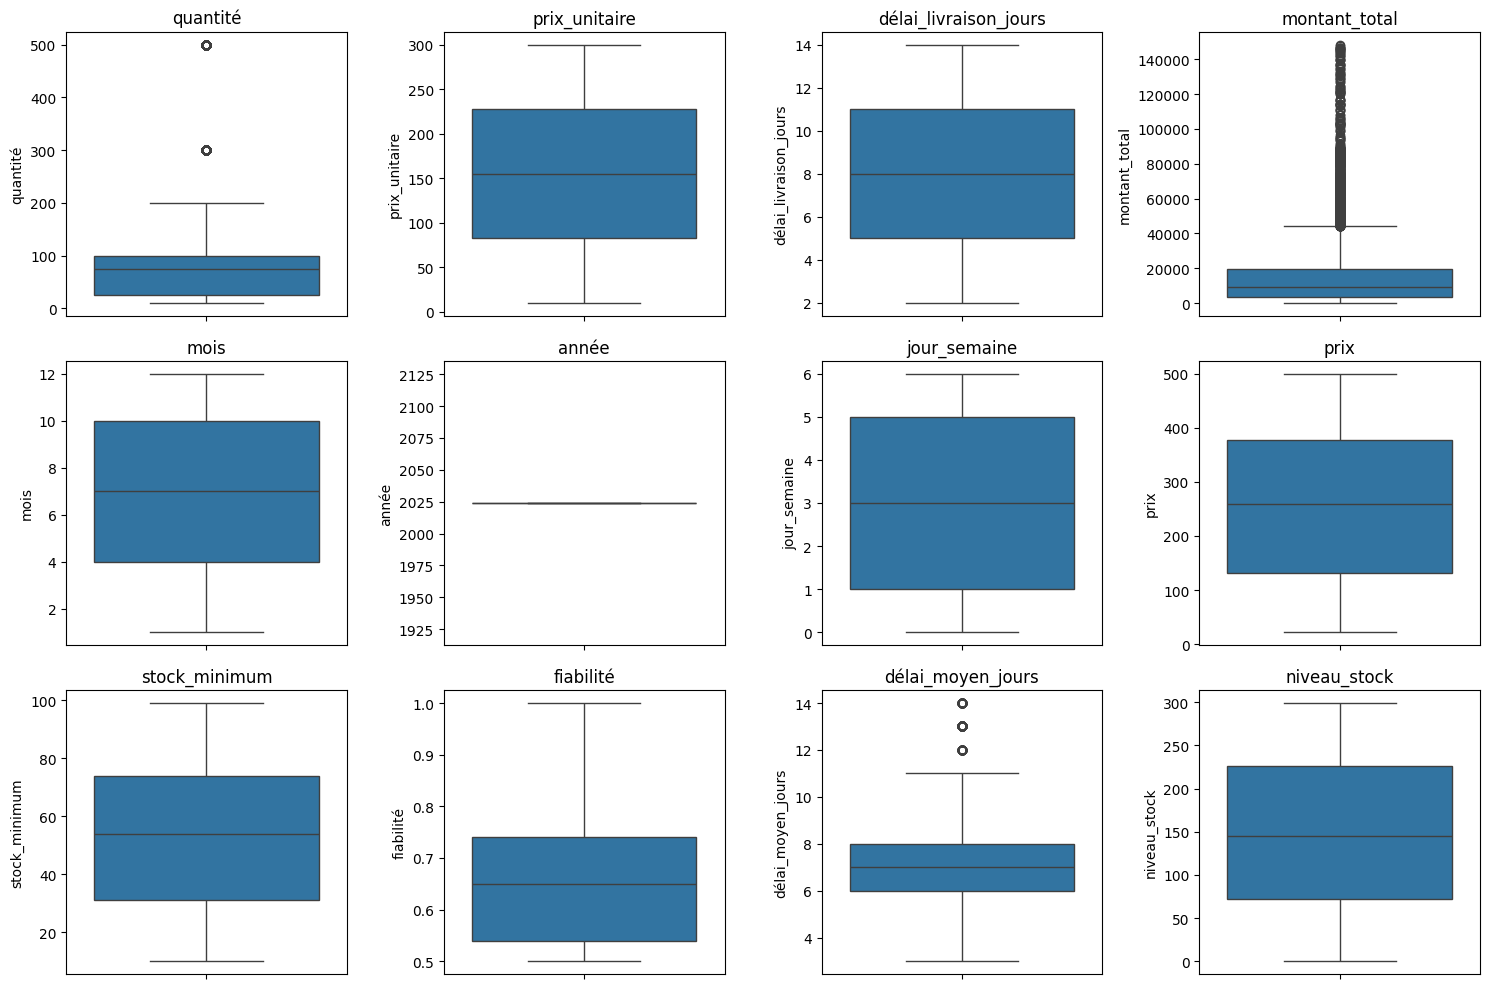

In [13]:
# Créer des box plots pour chaque variable numérique
numeric_columns = data.select_dtypes(include=['float64', 'int64']).columns

plt.figure(figsize=(15, 10))
for i, column in enumerate(numeric_columns, 1):
    plt.subplot(3, 4, i)  # Ajustez les dimensions du subplot en fonction du nombre de colonnes
    sns.boxplot(y=data[column])
    plt.title(column)

plt.tight_layout()
plt.show()

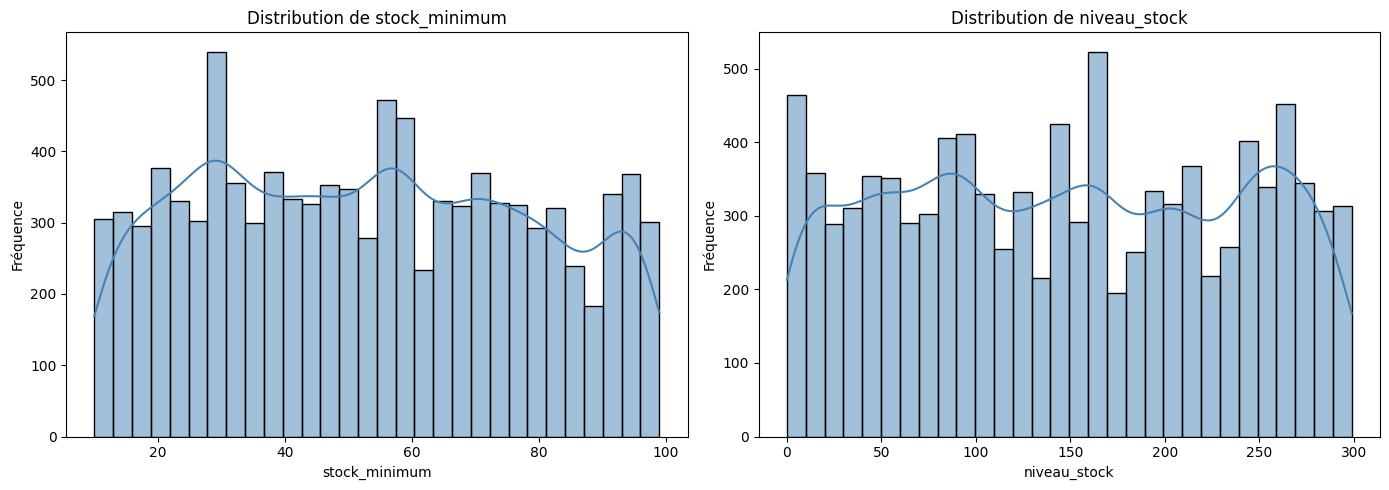

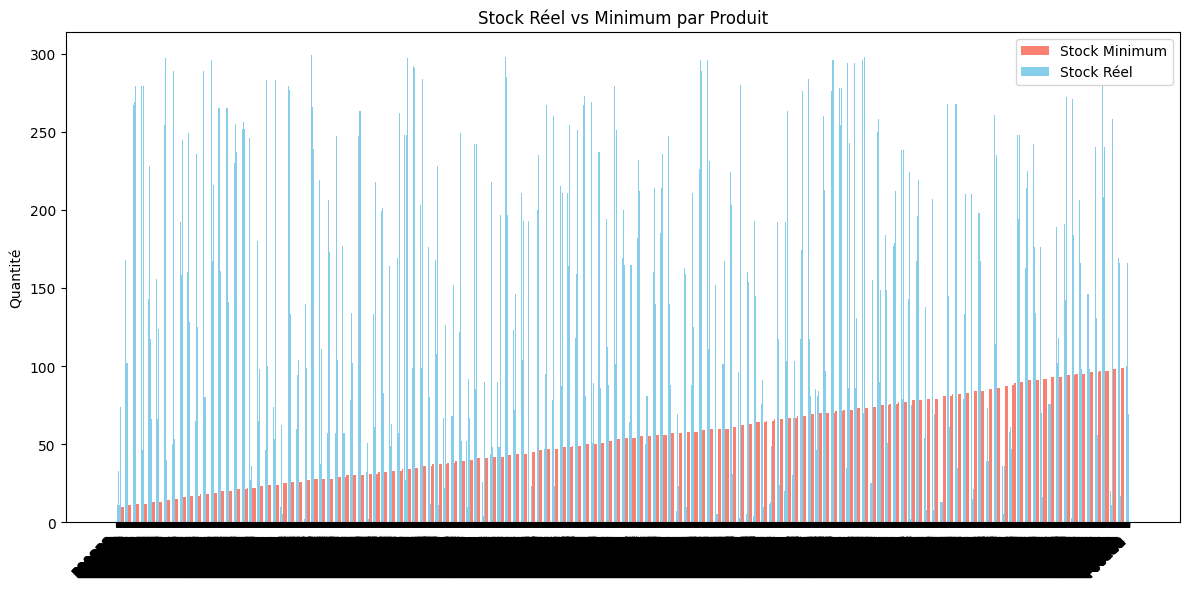

In [14]:
# 🎯 1. Distribution des stocks (minimum & réel)
plt.figure(figsize=(14, 5))

for i, column in enumerate(['stock_minimum', 'niveau_stock'], 1):
    plt.subplot(1, 2, i)
    sns.histplot(data[column], kde=True, bins=30, color='steelblue')
    plt.title(f'Distribution de {column}')
    plt.xlabel(column)
    plt.ylabel("Fréquence")

plt.tight_layout()
plt.show()

# 📊 2. Bar Chart : Stock réel vs Stock minimum par produit
plt.figure(figsize=(12, 6))
data_sorted = data.sort_values('stock_minimum')
bar_width = 0.4
x = range(len(data_sorted))

plt.bar(x, data_sorted['stock_minimum'], width=bar_width, label='Stock Minimum', color='salmon')
plt.bar([p + bar_width for p in x], data_sorted['niveau_stock'], width=bar_width, label='Stock Réel', color='skyblue')

plt.xticks([p + bar_width / 2 for p in x], data_sorted['id_produit'], rotation=45, ha='right')
plt.title('Stock Réel vs Minimum par Produit')
plt.ylabel('Quantité')
plt.legend()
plt.tight_layout()
plt.show()

/var/folders/vh/qf3897l148b6y6fm56x6m_pr0000gn/T/ipykernel_61397/501415501.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=ville_montant, x='ville', y='montant_total', palette='Blues_d')


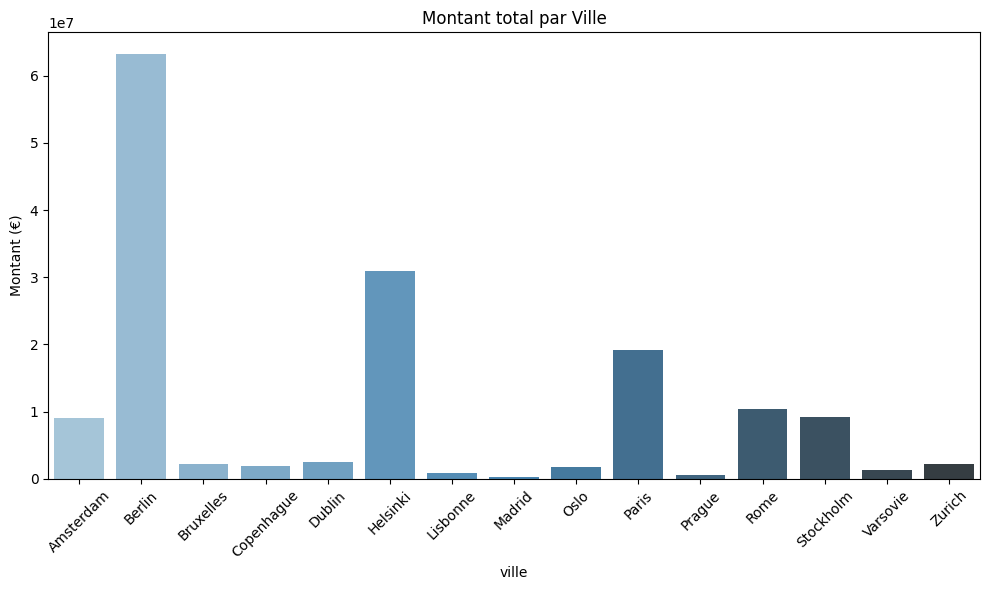

In [15]:
# 🏙️ 4. Bar Chart : Ville vs Montant total
plt.figure(figsize=(10, 6))
ville_montant = data.groupby('ville')['montant_total'].sum().reset_index()
sns.barplot(data=ville_montant, x='ville', y='montant_total', palette='Blues_d')
plt.title('Montant total par Ville')
plt.xticks(rotation=45)
plt.ylabel('Montant (€)')
plt.tight_layout()
plt.show()


/var/folders/vh/qf3897l148b6y6fm56x6m_pr0000gn/T/ipykernel_61397/4150229535.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=data, x='nom_fournisseur', y='fiabilité', palette='coolwarm')


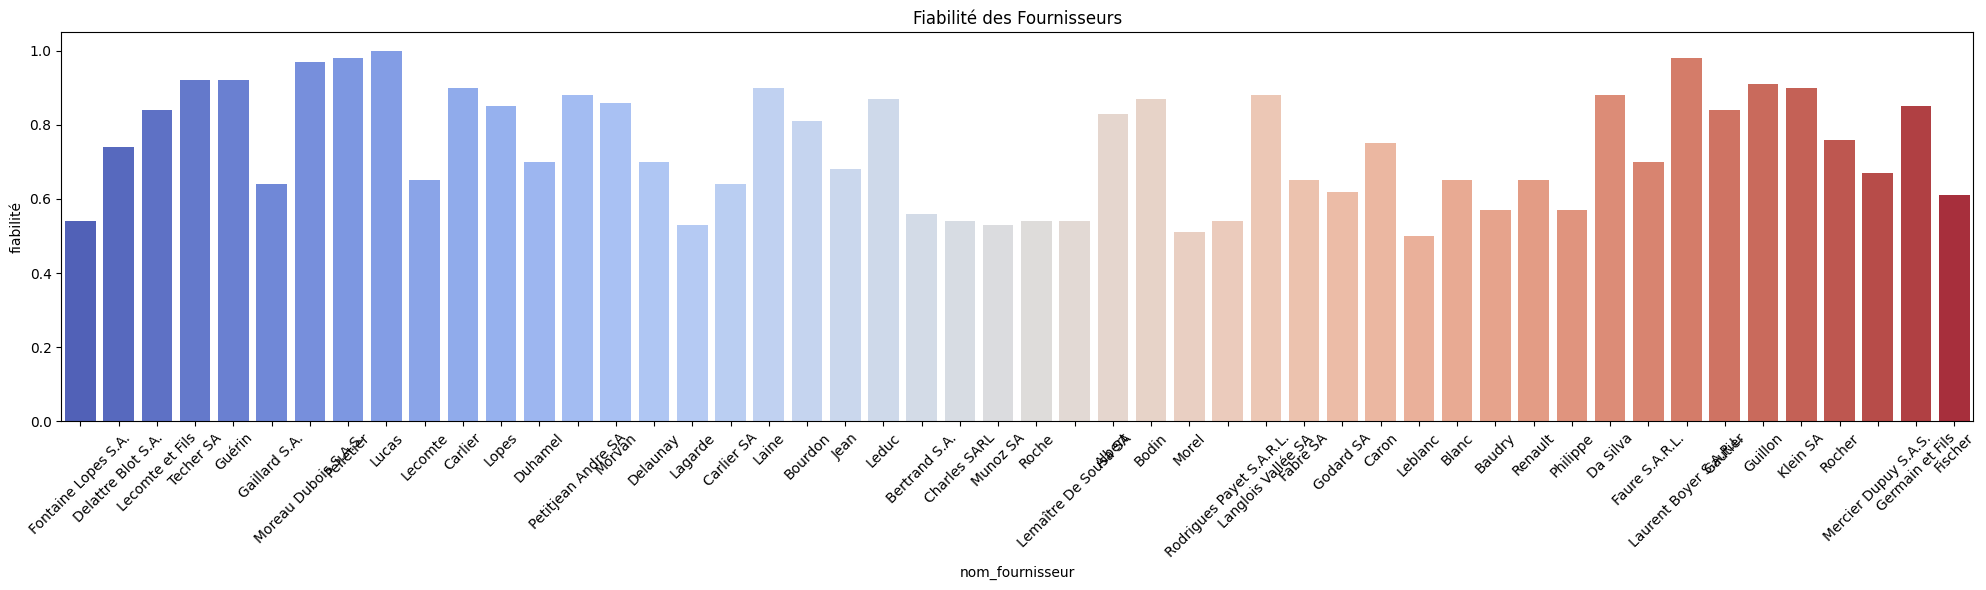

In [16]:
# 🧩 6. Fiabilité vs Fournisseur (Scatter ou Barplot selon type de variable)
plt.figure(figsize=(20, 6))
# Si 'fiabilité' est numérique :
sns.barplot(data=data, x='nom_fournisseur', y='fiabilité', palette='coolwarm')
# Sinon si c’est une catégorie : utiliser `countplot` ou mapper en valeur numérique
plt.title('Fiabilité des Fournisseurs')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

/var/folders/vh/qf3897l148b6y6fm56x6m_pr0000gn/T/ipykernel_61397/620272134.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=quantite_par_fournisseur, x='nom_fournisseur', y='quantité', palette='Blues_d')


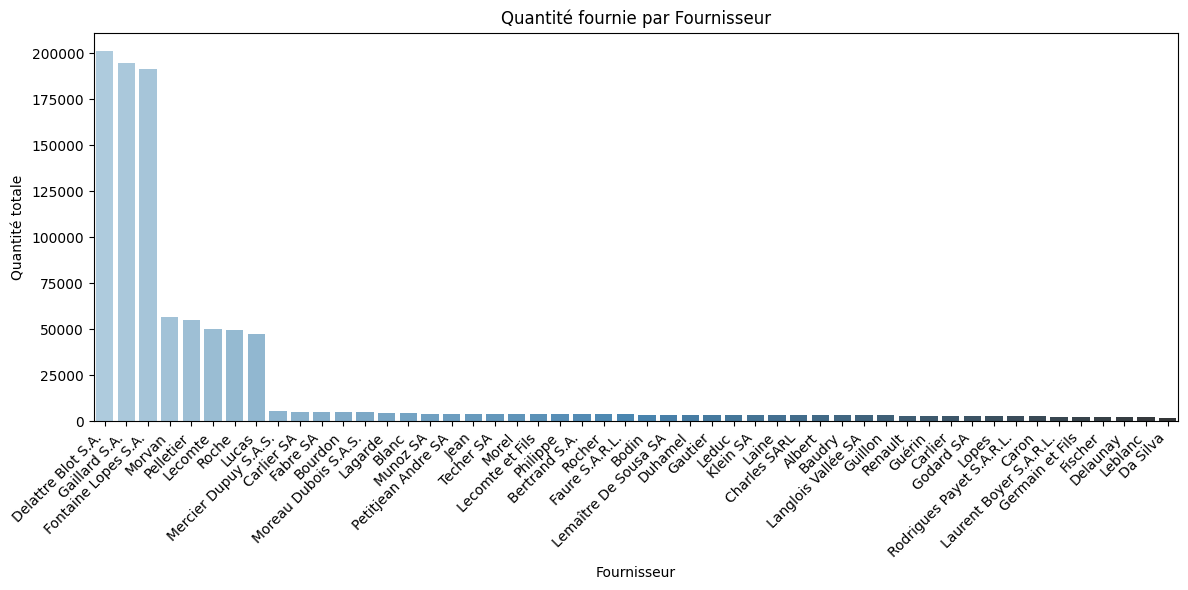

In [17]:
# Regrouper les quantités par fournisseur
quantite_par_fournisseur = data.groupby('nom_fournisseur')['quantité'].sum().reset_index()

# Trier du plus grand au plus petit
quantite_par_fournisseur = quantite_par_fournisseur.sort_values(by='quantité', ascending=False)

# Bar Chart
plt.figure(figsize=(12, 6))
sns.barplot(data=quantite_par_fournisseur, x='nom_fournisseur', y='quantité', palette='Blues_d')
plt.title('Quantité fournie par Fournisseur')
plt.xlabel('Fournisseur')
plt.ylabel('Quantité totale')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

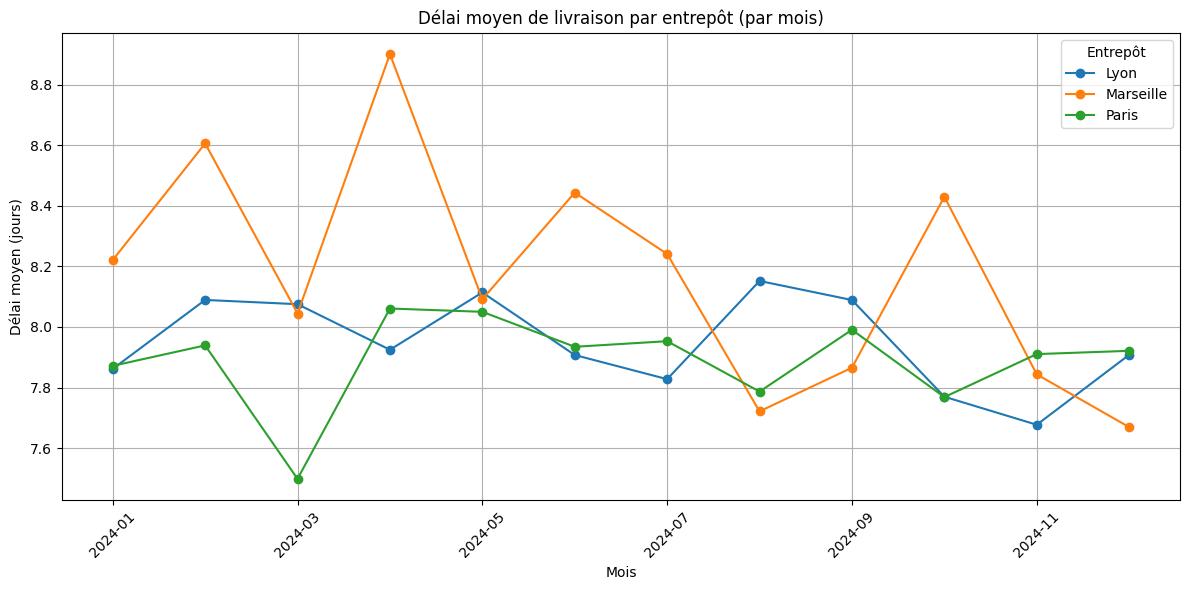

In [18]:
# Créer une colonne 'date' au format AAAA-MM pour grouper par mois
# Clean the 'date_achat' column by replacing invalid dates with NaT
data['date_achat'] = pd.to_datetime(data['date_achat'], errors='coerce', format='%Y-%m-%d')

# Drop rows with invalid dates
data = data.dropna(subset=['date_achat'])

# Create a 'mois_complet' column in the format YYYY-MM for grouping by month
data['mois_complet'] = data['date_achat'].dt.to_period('M').astype(str)

# Grouper par mois + entrepôt et calculer la moyenne du délai de livraison
delai_mensuel = data.groupby(['mois_complet', 'entrepot'])['délai_livraison_jours'].mean().reset_index()

# Pivot pour créer une colonne par entrepôt (utile pour matplotlib)
pivot = delai_mensuel.pivot(index='mois_complet', columns='entrepot', values='délai_livraison_jours')

# Tracer
pivot.plot(marker='o', figsize=(12, 6))
plt.title("Délai moyen de livraison par entrepôt (par mois)")
plt.xlabel("Mois")
plt.ylabel("Délai moyen (jours)")
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.legend(title="Entrepôt")
plt.show()


In [19]:
print(data.columns)


Index(['id_achat', 'date_achat', 'id_produit', 'quantité', 'id_fournisseur',
       'prix_unitaire', 'délai_livraison_jours', 'montant_total', 'mois',
       'année', 'jour_semaine', 'catégorie', 'marque', 'prix', 'stock_minimum',
       'nom_fournisseur', 'ville', 'pays', 'fiabilité', 'délai_moyen_jours',
       'niveau_stock', 'entrepot', 'mois_complet'],
      dtype='object')


In [20]:
# Fonction pour calculer le HHI
def calculate_hhi(series):
    shares = series / series.sum()
    hhi = (shares ** 2).sum() * 10000  # HHI est souvent multiplié par 10,000 pour lisibilité
    return hhi

# HHI par produit
quantities_by_product = data.groupby('id_produit')['quantité'].sum()
hhi_product = calculate_hhi(quantities_by_product)

# HHI par fournisseur
quantities_by_supplier = data.groupby('id_fournisseur')['quantité'].sum()
hhi_supplier = calculate_hhi(quantities_by_supplier)

hhi_product, hhi_supplier

(np.float64(11.996626030740527), np.float64(1301.638054542709))



HHI par produit : 12.0 → très faible concentration → les achats sont très bien répartis entre les produits.
HHI par fournisseur : 1301.5 → concentration modérée → certains fournisseurs livrent davantage que d'autres, mais aucun ne domine totalement.

/var/folders/vh/qf3897l148b6y6fm56x6m_pr0000gn/T/ipykernel_61397/1811700647.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=hhi_data, x='Catégorie', y='HHI', palette='viridis')


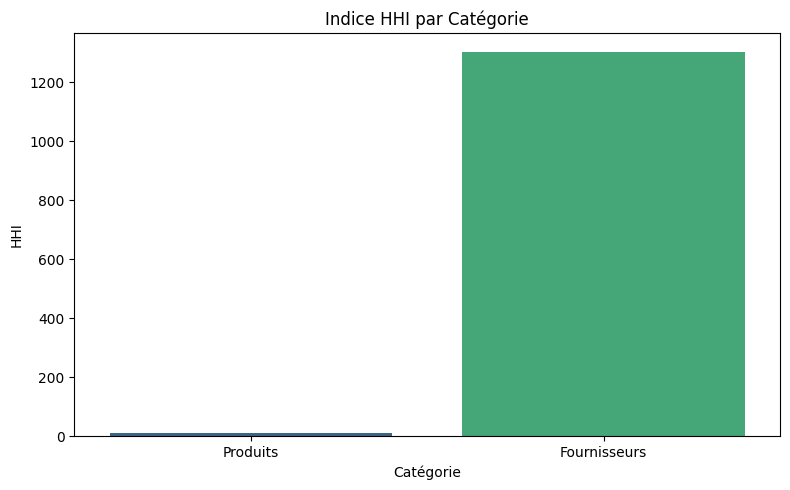

In [21]:
# Visualisation des indices HHI

# Créer un DataFrame pour les HHI
hhi_data = pd.DataFrame({
    'Catégorie': ['Produits', 'Fournisseurs'],
    'HHI': [hhi_product, hhi_supplier]
})

# Tracer un graphique en barres
plt.figure(figsize=(8, 5))
sns.barplot(data=hhi_data, x='Catégorie', y='HHI', palette='viridis')
plt.title('Indice HHI par Catégorie')
plt.ylabel('HHI')
plt.xlabel('Catégorie')
plt.tight_layout()
plt.show()

In [23]:
# Calculer la rotation moyenne des stocks par catégorie
rotation_par_categorie = data.groupby('catégorie')['rotation_stock'].mean().reset_index()

# Trier les catégories par rotation moyenne décroissante
rotation_par_categorie = rotation_par_categorie.sort_values(by='rotation_stock', ascending=False)

# Visualiser la rotation des stocks par catégorie
plt.figure(figsize=(12, 6))
sns.barplot(data=rotation_par_categorie, x='catégorie', y='rotation_stock', palette='viridis')
plt.title('Rotation des stocks par catégorie')
plt.xlabel('Catégorie')
plt.ylabel('Rotation des stocks')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

KeyError: 'Column not found: rotation_stock'

Le dernier visuel montre la rotation des stocks par catégorie sous forme de graphique en barres. Il met en évidence les catégories ayant les rotations les plus élevées, ce qui indique une fréquence de renouvellement rapide des stocks pour ces catégories. Par exemple, les "Soins capillaires" et le "Maquillage" ont les rotations les plus élevées, ce qui peut refléter une forte demande ou une gestion efficace des stocks. À l'inverse, les catégories avec une rotation plus faible, comme les "Soins de la peau", pourraient nécessiter une analyse pour optimiser leur gestion ou mieux comprendre leur demande.

Taux de satisfaction global : 20.22%


/var/folders/vh/qf3897l148b6y6fm56x6m_pr0000gn/T/ipykernel_2127/2970179939.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=satisfaction_par_fournisseur, x='nom_fournisseur', y='satisfaction', palette='coolwarm')


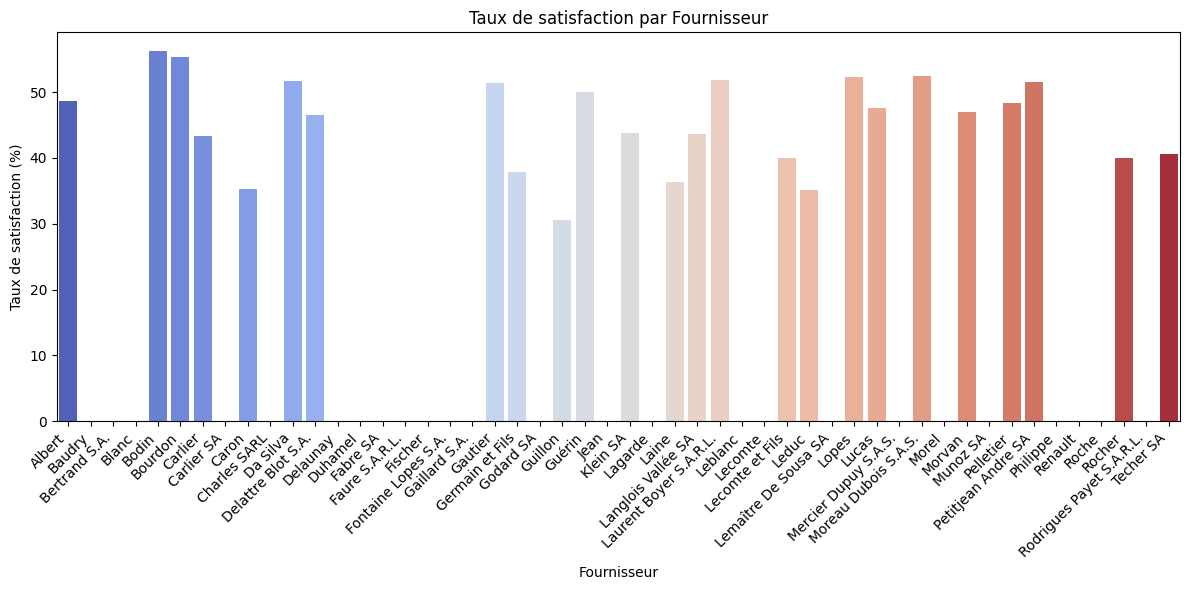

In [ ]:
# Calculer le taux de satisfaction des commandes
# Une commande est considérée comme satisfaisante si le délai de livraison est inférieur ou égal à la moyenne et si la fiabilité est supérieure à un seuil (par exemple, 0.7)
seuil_fiabilite = 0.7
delai_moyen = data['délai_livraison_jours'].mean()

data['satisfaction'] = ((data['délai_livraison_jours'] <= delai_moyen) & (data['fiabilité'] > seuil_fiabilite)).astype(int)

# Calculer le taux de satisfaction global
taux_satisfaction = data['satisfaction'].mean() * 100
print(f"Taux de satisfaction global : {taux_satisfaction:.2f}%")

# Visualiser le taux de satisfaction par fournisseur
satisfaction_par_fournisseur = data.groupby('nom_fournisseur')['satisfaction'].mean().reset_index()
satisfaction_par_fournisseur['satisfaction'] *= 100

plt.figure(figsize=(12, 6))
sns.barplot(data=satisfaction_par_fournisseur, x='nom_fournisseur', y='satisfaction', palette='coolwarm')
plt.title('Taux de satisfaction par Fournisseur')
plt.xlabel('Fournisseur')
plt.ylabel('Taux de satisfaction (%)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Le visuel montre le taux de satisfaction par fournisseur sous forme de graphique en barres. Il met en évidence les fournisseurs ayant les taux de satisfaction les plus élevés, ce qui reflète une meilleure performance en termes de fiabilité et de respect des délais de livraison. Par exemple, certains fournisseurs comme "Bodin" et "Bourdon" affichent des taux de satisfaction supérieurs à 50 %, ce qui indique une bonne gestion de leurs commandes. En revanche, plusieurs fournisseurs ont un taux de satisfaction nul, ce qui peut signaler des problèmes récurrents dans leurs performances. Ce graphique permet d'identifier les partenaires fiables et ceux nécessitant une amélioration.

/var/folders/vh/qf3897l148b6y6fm56x6m_pr0000gn/T/ipykernel_2127/64781939.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=resilience_par_fournisseur, x='nom_fournisseur', y='score_resilience', palette='coolwarm')


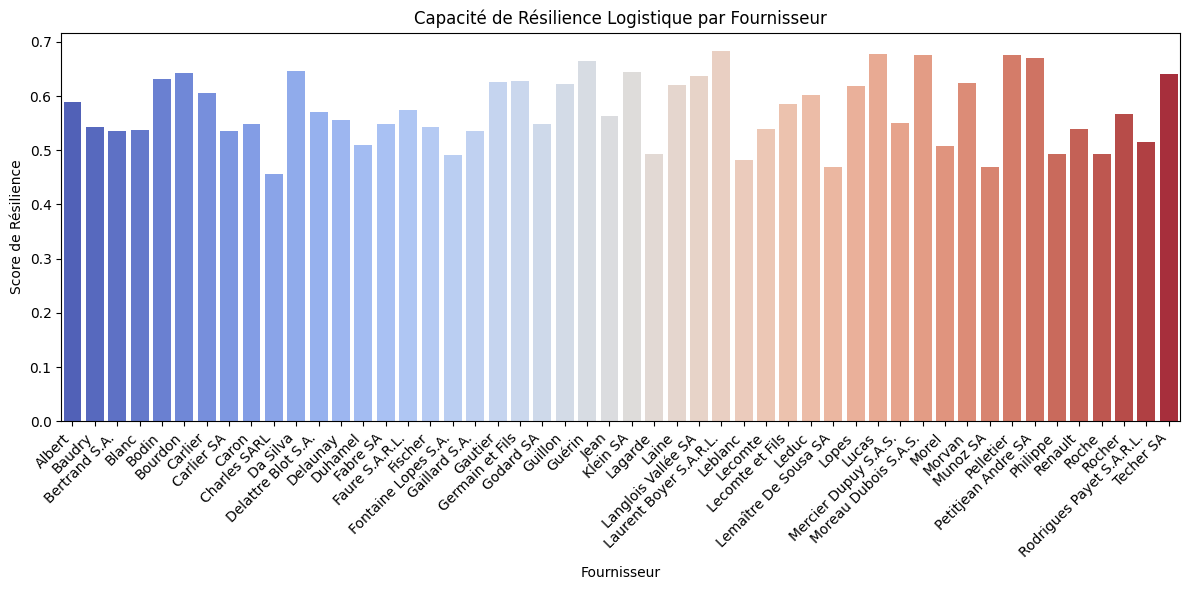

In [ ]:
# Définir les pondérations pour chaque indicateur
poids_fiabilite = 0.4
poids_delai = 0.3
poids_stock = 0.3

# Normaliser les indicateurs entre 0 et 1
data['fiabilite_norm'] = data['fiabilité'] / data['fiabilité'].max()
data['delai_norm'] = 1 - (data['délai_livraison_jours'] / data['délai_livraison_jours'].max())
data['stock_norm'] = data['niveau_stock'] / data['niveau_stock'].max()

# Calculer le score de résilience pour chaque ligne
data['score_resilience'] = (
    poids_fiabilite * data['fiabilite_norm'] +
    poids_delai * data['delai_norm'] +
    poids_stock * data['stock_norm']
)

# Calculer la résilience moyenne par fournisseur
resilience_par_fournisseur = data.groupby('nom_fournisseur')['score_resilience'].mean().reset_index()

# Visualiser la résilience par fournisseur
plt.figure(figsize=(12, 6))
sns.barplot(data=resilience_par_fournisseur, x='nom_fournisseur', y='score_resilience', palette='coolwarm')
plt.title('Capacité de Résilience Logistique par Fournisseur')
plt.xlabel('Fournisseur')
plt.ylabel('Score de Résilience')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Le dernier visuel illustre la capacité de résilience logistique par fournisseur sous forme de graphique en barres. Il met en évidence les fournisseurs ayant les scores de résilience les plus élevés, reflétant une meilleure performance globale en termes de fiabilité, délais de livraison et gestion des stocks. Par exemple, des fournisseurs comme "Laurent Boyer S.A.R.L." et "Lucas" affichent des scores de résilience supérieurs à 0.67, ce qui indique une gestion logistique efficace. En revanche, certains fournisseurs comme "Leblanc" et "Lagarde" ont des scores plus faibles, suggérant des opportunités d'amélioration dans leur chaîne logistique. Ce graphique permet d'identifier les partenaires les plus performants et ceux nécessitant une attention particulière pour optimiser la résilience globale.

Les Insectes sontarrivées 

# COde qui ne fonctionne pas 

In [24]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9999 entries, 0 to 9999
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   id_achat               9999 non-null   object        
 1   date_achat             9999 non-null   datetime64[ns]
 2   id_produit             9999 non-null   object        
 3   quantité               9999 non-null   int64         
 4   id_fournisseur         9999 non-null   object        
 5   prix_unitaire          9999 non-null   float64       
 6   délai_livraison_jours  9999 non-null   int64         
 7   montant_total          9999 non-null   float64       
 8   mois                   9999 non-null   int64         
 9   année                  9999 non-null   int64         
 10  jour_semaine           9999 non-null   int64         
 11  catégorie              9999 non-null   object        
 12  marque                 9999 non-null   object        
 13  prix    

In [25]:
# Encodage one-hot des variables catégorielles principales
colonnes_categorique = ['catégorie', 'marque', 'nom_fournisseur', 'ville', 'pays', 'entrepot']

data_encoded = pd.get_dummies(data, columns=colonnes_categorique, drop_first=True)
data_encoded.head()

,id_achat,date_achat,id_produit,quantité,id_fournisseur,prix_unitaire,délai_livraison_jours,montant_total,mois,année,...,pays_Italie,pays_Norvège,pays_Pays-Bas,pays_Pologne,pays_Portugal,pays_République tchèque,pays_Suisse,pays_Suède,entrepot_Marseille,entrepot_Paris
0,PO000001,2024-03-22,P00627,150,S029,129.62,14,19443.0,3,2024,...,False,False,False,False,False,False,False,False,False,True
1,PO000002,2024-06-12,P00469,50,S028,110.81,8,5540.5,6,2024,...,False,False,False,False,False,False,False,False,False,True
2,PO000003,2024-01-19,P00849,75,S001,140.58,8,10543.5,1,2024,...,False,False,False,False,False,False,True,False,True,False
3,PO000004,2024-11-20,P00484,500,S028,120.77,9,60385.0,11,2024,...,False,False,False,False,False,False,False,False,True,False
5,PO000006,2024-03-21,P00013,50,S029,90.66,12,4533.0,3,2024,...,False,False,False,False,False,False,False,False,False,False


In [29]:
# Encodage one-hot de toutes les colonnes de type 'object' (catégorielles)
colonnes_objet = data.select_dtypes(include=['object']).columns.tolist()

# On retire les colonnes déjà numériques ou datetime si besoin
if 'date_achat' in colonnes_objet:
    colonnes_objet.remove('date_achat')

data_all_encoded = pd.get_dummies(data, columns=colonnes_objet, drop_first=True)
data_all_encoded.head()

,date_achat,quantité,prix_unitaire,délai_livraison_jours,montant_total,mois,année,jour_semaine,prix,stock_minimum,...,mois_complet_2024-03,mois_complet_2024-04,mois_complet_2024-05,mois_complet_2024-06,mois_complet_2024-07,mois_complet_2024-08,mois_complet_2024-09,mois_complet_2024-10,mois_complet_2024-11,mois_complet_2024-12
0,2024-03-22,150,129.62,14,19443.0,3,2024,4,39.95,18,...,True,False,False,False,False,False,False,False,False,False
1,2024-06-12,50,110.81,8,5540.5,6,2024,2,25.58,18,...,False,False,False,True,False,False,False,False,False,False
2,2024-01-19,75,140.58,8,10543.5,1,2024,4,62.78,83,...,False,False,False,False,False,False,False,False,False,False
3,2024-11-20,500,120.77,9,60385.0,11,2024,2,259.47,39,...,False,False,False,False,False,False,False,False,True,False
5,2024-03-21,50,90.66,12,4533.0,3,2024,3,236.40,61,...,True,False,False,False,False,False,False,False,False,False


In [31]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9999 entries, 0 to 9999
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   id_achat               9999 non-null   object        
 1   date_achat             9999 non-null   datetime64[ns]
 2   id_produit             9999 non-null   object        
 3   quantité               9999 non-null   int64         
 4   id_fournisseur         9999 non-null   object        
 5   prix_unitaire          9999 non-null   float64       
 6   délai_livraison_jours  9999 non-null   int64         
 7   montant_total          9999 non-null   float64       
 8   mois                   9999 non-null   int64         
 9   année                  9999 non-null   int64         
 10  jour_semaine           9999 non-null   int64         
 11  catégorie              9999 non-null   object        
 12  marque                 9999 non-null   object        
 13  prix    

In [ ]:
# Encodage de toutes les colonnes non numériques en variables numériques

import pandas as pd

# Si vous avez des colonnes de type date, vous pouvez les convertir en timestamp ou extraire des informations utiles
if 'date_achat' in data.columns:
    data['date_achat'] = pd.to_datetime(data['date_achat'], errors='coerce')
    data['date_achat_timestamp'] = data['date_achat'].astype('int64') // 10**9  # conversion en secondes

# Sélection des colonnes de type 'object' (catégorielles)
colonnes_objet = data.select_dtypes(include=['object']).columns.tolist()

# Encodage one-hot de toutes les colonnes catégorielles
data_numeric = pd.get_dummies(data, columns=colonnes_objet, drop_first=True)

# Affichage des premières lignes pour vérification
data_numeric.head()

In [34]:
import pandas as pd

# Conversion de la colonne date si elle existe
if 'date_achat' in data.columns:
    data['date_achat'] = pd.to_datetime(data['date_achat'], errors='coerce')
    data['date_achat_timestamp'] = data['date_achat'].astype('int64') // 10**9  # conversion en secondes

# Liste des colonnes object (catégorielles)
colonnes_objet = data.select_dtypes(include=['object']).columns.tolist()

# Encodage one-hot de toutes les colonnes catégorielles
data_numeric = pd.get_dummies(data, columns=colonnes_objet, drop_first=True)

# Vérification du résultat
print(data_numeric.select_dtypes(include=['object']).columns)  # Doit afficher Index([], dtype='object')
data_numeric.info()

Index([], dtype='object')
<class 'pandas.core.frame.DataFrame'>
Index: 9999 entries, 0 to 9999
Columns: 11183 entries, date_achat to mois_complet_2024-12
dtypes: bool(11169), datetime64[ns](1), float64(4), int64(9)
memory usage: 107.6 MB


In [37]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9999 entries, 0 to 9999
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   id_achat               9999 non-null   object        
 1   date_achat             9999 non-null   datetime64[ns]
 2   id_produit             9999 non-null   object        
 3   quantité               9999 non-null   int64         
 4   id_fournisseur         9999 non-null   object        
 5   prix_unitaire          9999 non-null   float64       
 6   délai_livraison_jours  9999 non-null   int64         
 7   montant_total          9999 non-null   float64       
 8   mois                   9999 non-null   int64         
 9   année                  9999 non-null   int64         
 10  jour_semaine           9999 non-null   int64         
 11  catégorie              9999 non-null   object        
 12  marque                 9999 non-null   object        
 13  prix    

In [39]:
%pip install scikit-learn

from sklearn.preprocessing import LabelEncoder

data_le = data.copy()
colonnes_objet = data_le.select_dtypes(include=['object']).columns

le = LabelEncoder()
for col in colonnes_objet:
    data_le[col] = le.fit_transform(data_le[col].astype(str))

# Vérification : il ne doit plus rester de colonnes object
print(data_le.select_dtypes(include=['object']).columns)  # Doit afficher Index([], dtype='object')
data_le.info()

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 3.5 MB/s eta 0:00:00
  Using cached threadpoolctl-3.6.0-py3-none-any.whl.metadata (13 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.2/11.2 MB 48.3 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 307.7/307.7 kB 19.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 30.2/30.2 MB 26.7 MB/s eta 0:00:0000:0100:01
Using cached threadpoolctl-3.6.0-py3-none-any.whl (18 kB)

[notice] A new release of pip is available: 24.0 -> 25.1.1
[notice] To update, run: pip3.12 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.
Index([], dtype='object')
<class 'pandas.core.frame.DataFrame'>
Index: 9999 entries, 0 to 9999
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   id_achat               9999 non-null   int64         
 1   date_achat             9999 non-null   datet

In [40]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9999 entries, 0 to 9999
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   id_achat               9999 non-null   object        
 1   date_achat             9999 non-null   datetime64[ns]
 2   id_produit             9999 non-null   object        
 3   quantité               9999 non-null   int64         
 4   id_fournisseur         9999 non-null   object        
 5   prix_unitaire          9999 non-null   float64       
 6   délai_livraison_jours  9999 non-null   int64         
 7   montant_total          9999 non-null   float64       
 8   mois                   9999 non-null   int64         
 9   année                  9999 non-null   int64         
 10  jour_semaine           9999 non-null   int64         
 11  catégorie              9999 non-null   object        
 12  marque                 9999 non-null   object        
 13  prix    

In [42]:
# Convertir les colonnes object restantes en catégories puis en codes
for col in data.select_dtypes(include='object').columns:
    data[col] = data[col].astype('category').cat.codes


In [ ]:
data.info(import matplotlib.pyplot as plt
import seaborn as sns

# Choisis le DataFrame où toutes les variables sont numériques (ex : data_le ou data_numeric)
df_corr = data_le  # ou data_numeric selon ce que tu utilises

plt.figure(figsize=(18, 12))
corr = df_corr.corr()
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Matrice de corrélation entre toutes les variables")
plt.tight_layout()
plt.show())

<class 'pandas.core.frame.DataFrame'>
Index: 9999 entries, 0 to 9999
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   id_achat               9999 non-null   int16         
 1   date_achat             9999 non-null   datetime64[ns]
 2   id_produit             9999 non-null   int16         
 3   quantité               9999 non-null   int64         
 4   id_fournisseur         9999 non-null   int8          
 5   prix_unitaire          9999 non-null   float64       
 6   délai_livraison_jours  9999 non-null   int64         
 7   montant_total          9999 non-null   float64       
 8   mois                   9999 non-null   int64         
 9   année                  9999 non-null   int64         
 10  jour_semaine           9999 non-null   int64         
 11  catégorie              9999 non-null   int8          
 12  marque                 9999 non-null   int8          
 13  prix    

In [47]:
from sklearn.preprocessing import LabelEncoder

# Encodage des variables catégorielles principales dans data_encoded

# Liste des colonnes catégorielles à encoder
colonnes_categorique = ['ville', 'pays', 'nom_fournisseur', 'catégorie', 'marque', 'entrepot', 'mois_complet']

label_encoder = LabelEncoder()

for col in colonnes_categorique:
    if col in data_encoded.columns:
        data_encoded[col] = label_encoder.fit_transform(data_encoded[col].astype(str))

# Vérification des types de données après encodage
print("\nTypes corrigés :")
print(data_encoded.dtypes)


Types corrigés :
id_achat                           object
date_achat                 datetime64[ns]
id_produit                         object
quantité                            int64
id_fournisseur                     object
                                ...      
pays_République tchèque              bool
pays_Suisse                          bool
pays_Suède                           bool
entrepot_Marseille                   bool
entrepot_Paris                       bool
Length: 129, dtype: object


In [48]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9999 entries, 0 to 9998
Data columns (total 22 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   id_achat               9999 non-null   int16         
 1   date_achat             9999 non-null   datetime64[ns]
 2   id_produit             9999 non-null   int16         
 3   quantité               9999 non-null   int64         
 4   id_fournisseur         9999 non-null   int8          
 5   prix_unitaire          9999 non-null   float64       
 6   délai_livraison_jours  9999 non-null   int64         
 7   montant_total          9999 non-null   float64       
 8   mois                   9999 non-null   int64         
 9   année                  9999 non-null   int64         
 10  jour_semaine           9999 non-null   int64         
 11  catégorie              9999 non-null   int8          
 12  marque                 9999 non-null   int8          
 13  pri

In [55]:
from sklearn.preprocessing import MinMaxScaler

# Sélectionner uniquement les colonnes numériques pour la normalisation
colonnes_numeriques = data_encoded.select_dtypes(include=['int64', 'float64', 'bool']).columns

scaler = MinMaxScaler()
data_encoded_norm = data_encoded.copy()
data_encoded_norm[colonnes_numeriques] = scaler.fit_transform(data_encoded[colonnes_numeriques])

data_encoded_norm.head()

,id_achat,date_achat,id_produit,quantité,id_fournisseur,prix_unitaire,délai_livraison_jours,montant_total,mois,année,...,pays_Italie,pays_Norvège,pays_Pays-Bas,pays_Pologne,pays_Portugal,pays_République tchèque,pays_Suisse,pays_Suède,entrepot_Marseille,entrepot_Paris
0,PO000001,2024-03-22,P00627,0.285714,S029,0.412450,1.000000,0.130509,0.181818,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,PO000002,2024-06-12,P00469,0.081633,S028,0.347577,0.500000,0.036706,0.454545,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,PO000003,2024-01-19,P00849,0.132653,S001,0.450250,0.500000,0.070462,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
3,PO000004,2024-11-20,P00484,1.000000,S028,0.381928,0.583333,0.406753,0.909091,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
5,PO000006,2024-03-21,P00013,0.081633,S029,0.278082,0.833333,0.029908,0.181818,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [61]:
from sklearn.preprocessing import RobustScaler

# Utiliser RobustScaler pour une meilleure robustesse aux valeurs extrêmes
robust_scaler = RobustScaler()
data_encoded_robust = data_encoded.copy()
data_encoded_robust[colonnes_numeriques] = robust_scaler.fit_transform(data_encoded[colonnes_numeriques])

data_encoded_robust.head()

,id_achat,date_achat,id_produit,quantité,id_fournisseur,prix_unitaire,délai_livraison_jours,montant_total,mois,année,...,pays_Italie,pays_Norvège,pays_Pays-Bas,pays_Pologne,pays_Portugal,pays_République tchèque,pays_Suisse,pays_Suède,entrepot_Marseille,entrepot_Paris
0,PO000001,2024-03-22,P00627,1.000000,S029,-0.177739,1.000000,0.636916,-0.666667,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,PO000002,2024-06-12,P00469,-0.333333,S028,-0.307777,0.000000,-0.219109,-0.166667,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,PO000003,2024-01-19,P00849,0.000000,S001,-0.101970,0.000000,0.088943,-1.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,-1.0
3,PO000004,2024-11-20,P00484,5.666667,S028,-0.238922,0.166667,3.157859,0.666667,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,-1.0
5,PO000006,2024-03-21,P00013,-0.333333,S029,-0.447079,0.666667,-0.281145,-0.666667,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0


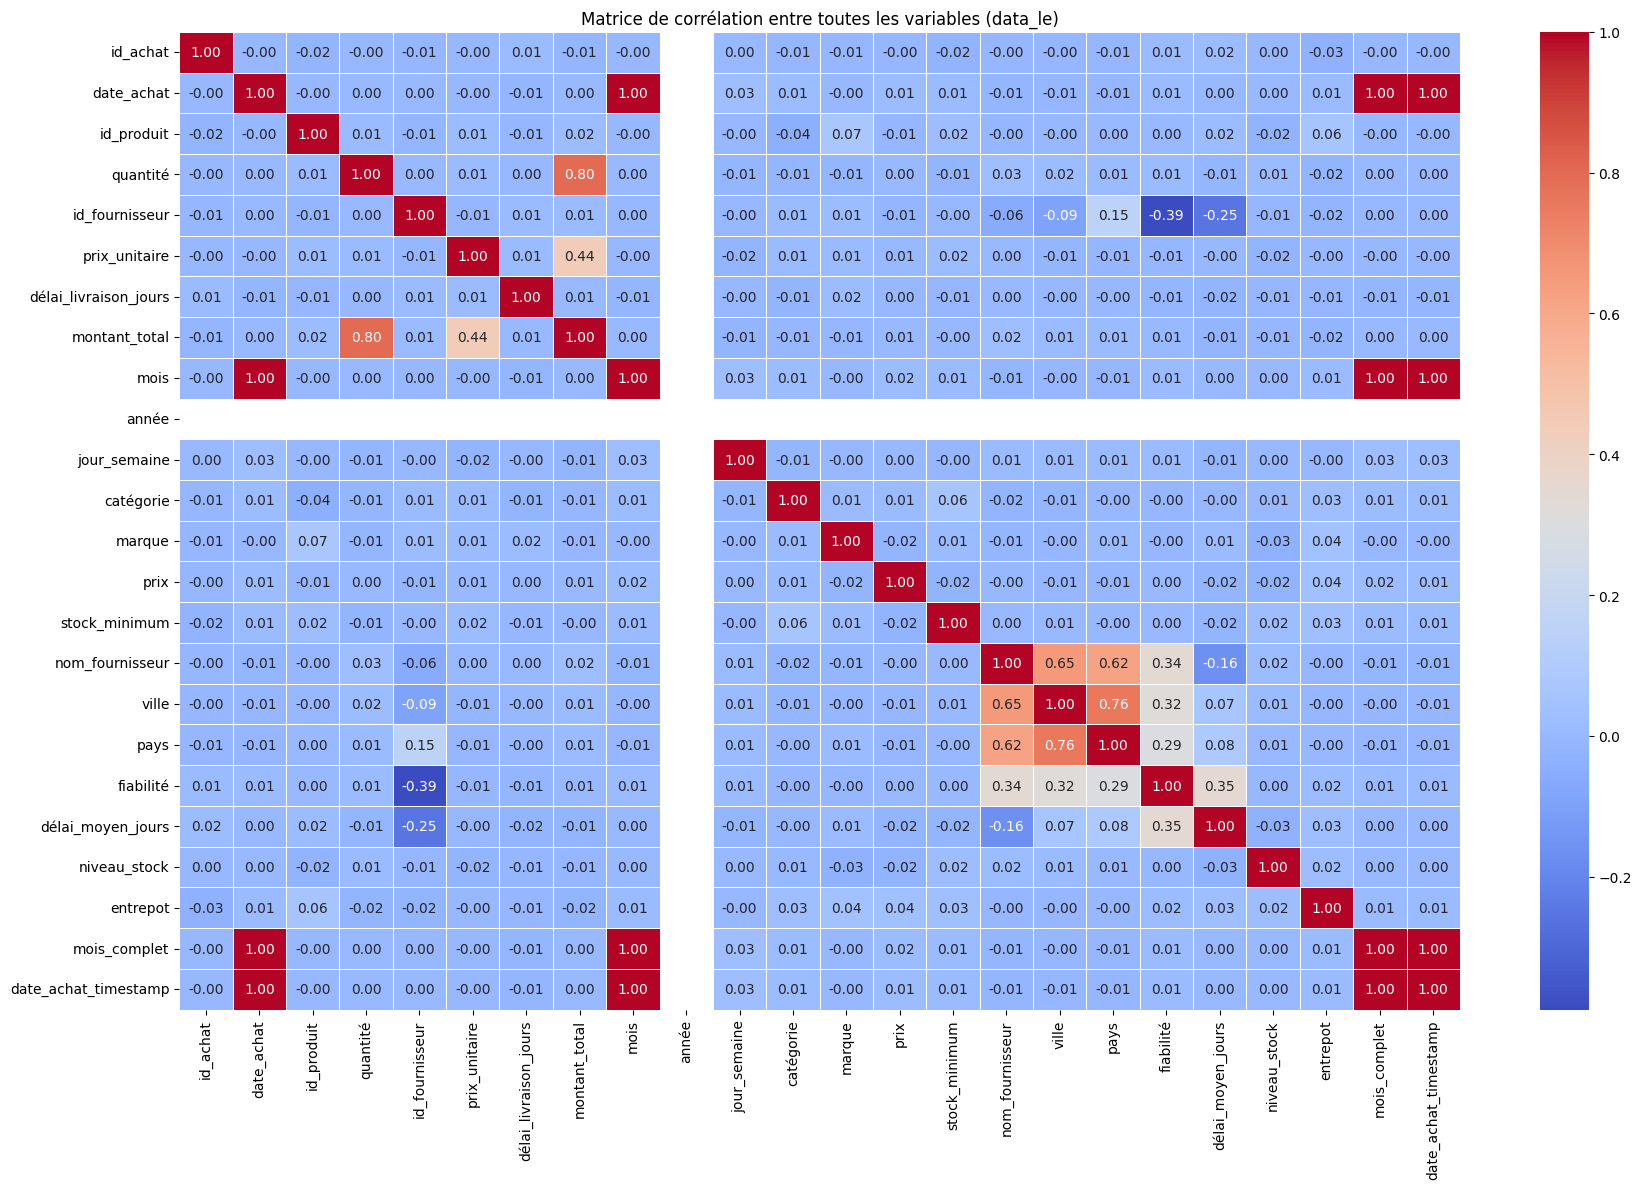

In [62]:
import seaborn as sns

import matplotlib.pyplot as plt

# Calcul de la matrice de corrélation sur data_le (toutes variables numériques)
plt.figure(figsize=(18, 12))
corr = data_le.corr()
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Matrice de corrélation entre toutes les variables (data_le)")
plt.tight_layout()
plt.show()

In [57]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Sélection des features et de la cible
X = data_le.drop(['quantité', 'date_achat'], axis=1)
y = data_le['quantité']

# Séparation en jeu d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Entraînement du modèle de régression linéaire
reg = LinearRegression()
reg.fit(X_train, y_train)

# Prédictions
y_pred = reg.predict(X_test)

# Évaluation
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.2f}")
print(f"R2 Score: {r2:.2f}")

Mean Squared Error: 2182.50
R2 Score: 0.76


In [63]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Sélection des features et de la cible pour la régression sur les délais de livraison
X_delai = data_le.drop(['délai_livraison_jours', 'date_achat'], axis=1)
y_delai = data_le['délai_livraison_jours']

# Séparation en jeu d'entraînement et de test
X_train_delai, X_test_delai, y_train_delai, y_test_delai = train_test_split(X_delai, y_delai, test_size=0.2, random_state=42)

# Entraînement du modèle de régression linéaire
reg_delai = LinearRegression()
reg_delai.fit(X_train_delai, y_train_delai)

# Prédictions
y_pred_delai = reg_delai.predict(X_test_delai)

# Évaluation
mse_delai = mean_squared_error(y_test_delai, y_pred_delai)
r2_delai = r2_score(y_test_delai, y_pred_delai)

print(f"Mean Squared Error (délai): {mse_delai:.2f}")
print(f"R2 Score (délai): {r2_delai:.2f}")

Mean Squared Error (délai): 14.04
R2 Score (délai): -0.00



### Régression Linéaire ###
MAE  : 26.77369467178594
RMSE : 46.71718875846067
R²   : 0.7589181618841471

### Random Forest Regressor ###
MAE  : 0.7361749999999999
RMSE : 2.939651127259832
R²   : 0.9990454412201213


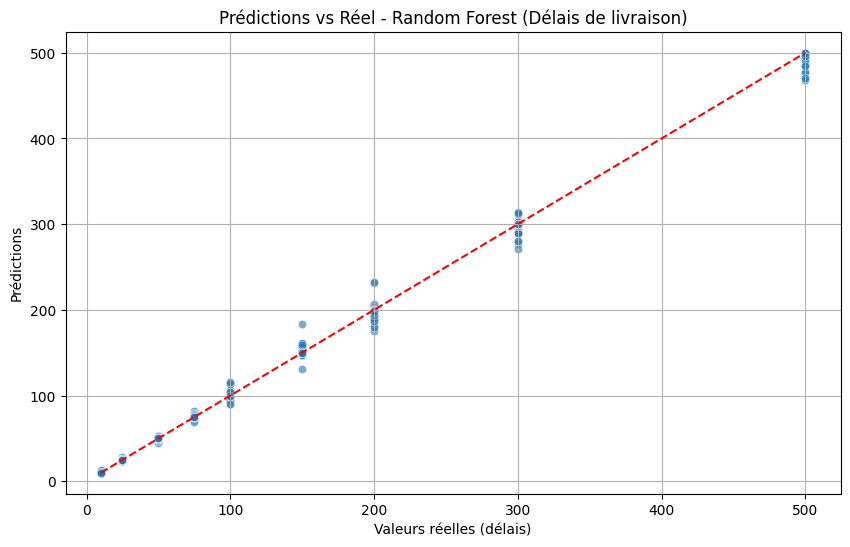

In [68]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# --- Mise à l’échelle des features ---
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# --- Régression Linéaire ---
lin_reg = LinearRegression()
lin_reg.fit(X_train_scaled, y_train)
y_pred_lin = lin_reg.predict(X_test_scaled)

# --- Random Forest Regressor ---
rf_reg = RandomForestRegressor(random_state=42)
rf_reg.fit(X_train_scaled, y_train)
y_pred_rf = rf_reg.predict(X_test_scaled)

# --- Fonction pour afficher les métriques de régression ---
def print_regression_metrics(y_true, y_pred, model_name):
    print(f"\n### {model_name} ###")
    print("MAE  :", mean_absolute_error(y_true, y_pred))
    print("RMSE :", np.sqrt(mean_squared_error(y_true, y_pred)))
    print("R²   :", r2_score(y_true, y_pred))

# --- Affichage des performances ---
print_regression_metrics(y_test, y_pred_lin, "Régression Linéaire")
print_regression_metrics(y_test, y_pred_rf, "Random Forest Regressor")

# --- Graphique : Prédictions vs Réel pour Random Forest ---
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred_rf, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Valeurs réelles (délais)")
plt.ylabel("Prédictions")
plt.title("Prédictions vs Réel - Random Forest (Délais de livraison)")
plt.grid(True)
plt.show()



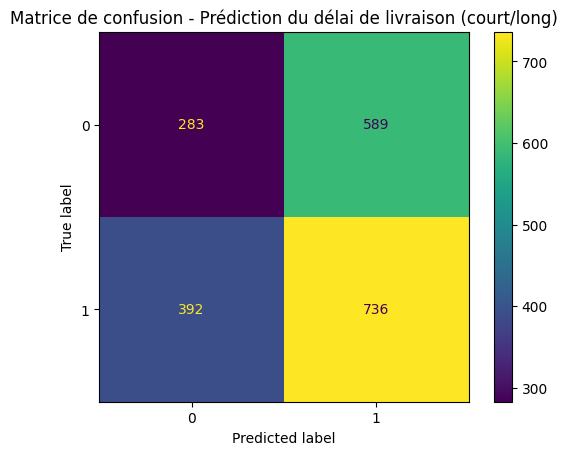

In [69]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Binariser la cible : 1 si délai <= médiane, 0 sinon
delai_median = data_le['délai_livraison_jours'].median()
y_bin = (data_le['délai_livraison_jours'] <= delai_median).astype(int)
X = data_le.drop(['délai_livraison_jours', 'date_achat'], axis=1)

# Split
X_train, X_test, y_train, y_test = train_test_split(X, y_bin, test_size=0.2, random_state=42)

# Modèle
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

# Matrice de confusion
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.title("Matrice de confusion - Prédiction du délai de livraison (court/long)")
plt.show()


### Régression Linéaire ###
MAE  : 3.27
RMSE : 3.75
R²   : -0.0

### Random Forest Regressor ###
MAE  : 3.3
RMSE : 3.81
R²   : -0.04


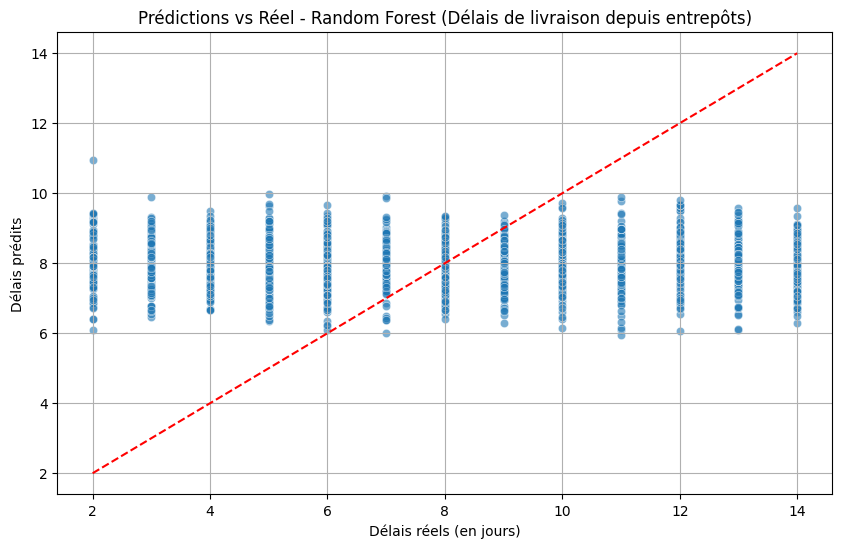

In [71]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# --- 1. Préparation des données ---
# Supposons que 'data_le' soit déjà prétraité (valeurs manquantes gérées, variables catégorielles encodées, etc.)

# On enlève les colonnes inutiles pour la prédiction
X_entrepots = data_le.drop(['délai_livraison_jours', 'date_achat'], axis=1)
y_entrepots = data_le['délai_livraison_jours']

# Split train/test
X_train, X_test, y_train, y_test = train_test_split(X_entrepots, y_entrepots, test_size=0.2, random_state=42)

# --- 2. Mise à l’échelle des données ---
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# --- 3. Modèles de Régression ---

# Régression Linéaire
lin_reg = LinearRegression()
lin_reg.fit(X_train_scaled, y_train)
y_pred_lin = lin_reg.predict(X_test_scaled)

# Random Forest
rf_reg = RandomForestRegressor(random_state=42)
rf_reg.fit(X_train_scaled, y_train)
y_pred_rf = rf_reg.predict(X_test_scaled)

# --- 4. Fonction d’évaluation ---
def print_regression_metrics(y_true, y_pred, model_name):
    print(f"\n### {model_name} ###")
    print("MAE  :", round(mean_absolute_error(y_true, y_pred), 2))
    print("RMSE :", round(np.sqrt(mean_squared_error(y_true, y_pred)), 2))
    print("R²   :", round(r2_score(y_true, y_pred), 2))

# --- 5. Affichage des performances ---
print_regression_metrics(y_test, y_pred_lin, "Régression Linéaire")
print_regression_metrics(y_test, y_pred_rf, "Random Forest Regressor")

# --- 6. Visualisation : Prédictions vs Réel pour Random Forest ---
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred_rf, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Délais réels (en jours)")
plt.ylabel("Délais prédits")
plt.title("Prédictions vs Réel - Random Forest (Délais de livraison depuis entrepôts)")
plt.grid(True)
plt.show()


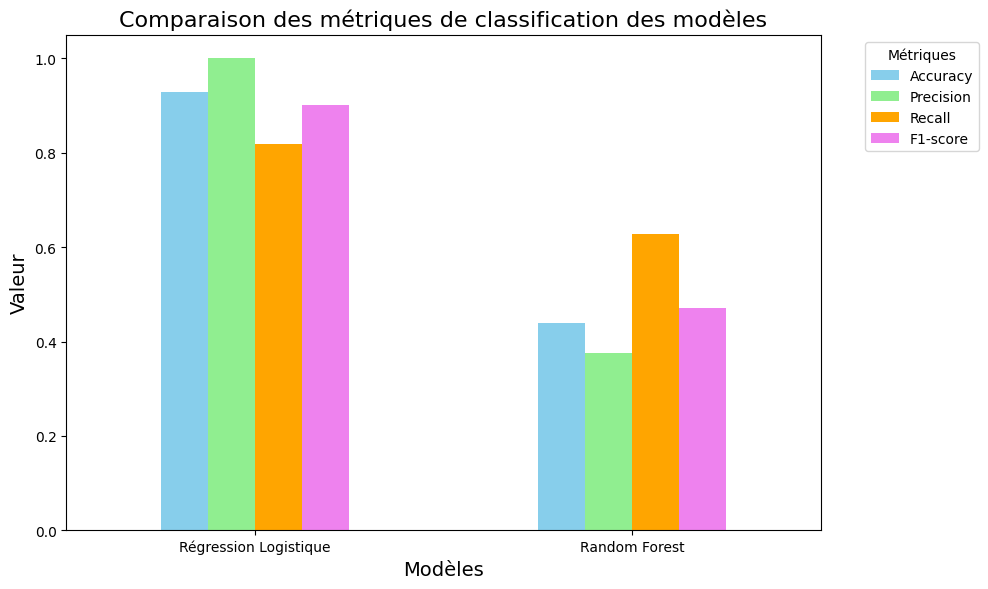

In [73]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Calcul des métriques pour la régression logistique
acc_log_reg = accuracy_score(y_test_bin, y_pred_log_reg)
prec_log_reg = precision_score(y_test_bin, y_pred_log_reg)
rec_log_reg = recall_score(y_test_bin, y_pred_log_reg)
f1_log_reg = f1_score(y_test_bin, y_pred_log_reg)

# Calcul des métriques pour le Random Forest
acc_rf = accuracy_score(y_test_bin, y_pred)
prec_rf = precision_score(y_test_bin, y_pred)
rec_rf = recall_score(y_test_bin, y_pred)
f1_rf = f1_score(y_test_bin, y_pred)

# Création d'un DataFrame pour stocker les résultats
metrics = pd.DataFrame(
    {
        "Model": ["Régression Logistique", "Random Forest"],
        "Accuracy": [acc_log_reg, acc_rf],
        "Precision": [prec_log_reg, prec_rf],
        "Recall": [rec_log_reg, rec_rf],
        "F1-score": [f1_log_reg, f1_rf],
    }
)

# --- Visualisation ---
metrics.set_index("Model").plot(
    kind="bar", figsize=(10, 6), color=["skyblue", "lightgreen", "orange", "violet"]
)

plt.title("Comparaison des métriques de classification des modèles", fontsize=16)
plt.ylabel("Valeur", fontsize=14)
plt.xlabel("Modèles", fontsize=14)
plt.xticks(rotation=0)
plt.legend(title="Métriques", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout()
plt.show()